In [1]:
#!pip install pandas

## Importación de Librerias

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Carga de Datos
Se trabajará con 2 datasets, uno con datos referidos a las viviendas y otro referido a las personas habitantes de la vivienda.

In [3]:
# Carga de Datos de vivienda.
df_hogares = pd.read_csv('../data/raw/EPH_usu_hogar_tic_t418.txt', delimiter=';')

# Carga de Datos de personas.
df_personas = pd.read_csv('../data/raw/EPH_usu_Indiv_tic_t418.txt', delimiter=';')

## Impresión de Datos de viviendas

In [4]:

print(df_hogares.head())

                          CODUSU  NRO_HOGAR  REALIZADA  ANO4  TRIMESTRE  \
0  TQRMNOPPQHJMKMCDEFIAH00622969          1          1  2018          4   
1  TQRMNOPPQHJMLUCDEFIAH00622993          1          1  2018          4   
2  TQRMNOPPQHMMLUCDEFIAH00594749          1          1  2018          4   
3  TQRMNOPPRHJMLUCDEFIAH00623008          1          1  2018          4   
4  TQRMNOPPSHJMKMCDEFIAH00623022          1          1  2018          4   

   AGLOMERADO  POND_TIC  IH_II_01  IH_II_02  
0           2       539         1         1  
1           2       545         1         1  
2           2       612         1         1  
3           2       545         1         1  
4           2       539         1         1  


## Impresión de Datos de personas

In [5]:
print(df_personas.head())

                          CODUSU  NRO_HOGAR  COMPONENTE  ANO4  TRIMESTRE  \
0  TQRMNOPPQHJMKMCDEFIAH00622969          1           1  2018          4   
1  TQRMNOPPQHJMKMCDEFIAH00622969          1           2  2018          4   
2  TQRMNOPPQHJMKMCDEFIAH00622969          1           3  2018          4   
3  TQRMNOPPQHJMLUCDEFIAH00622993          1           1  2018          4   
4  TQRMNOPPQHJMLUCDEFIAH00622993          1           2  2018          4   

   AGLOMERADO  POND_TIC  RESPONDENTE  IP_III_04  IP_III_05  IP_III_06  
0           2       539          1.0          1          1          1  
1           2       539          1.0          1          1          1  
2           2       539          1.0          1          1          1  
3           2       545          2.0          1          1          1  
4           2       545          2.0          1          1          1  


## Limpieza y preparación de Datos

In [6]:
# Selección de filas relevantes para el análisis de hogares (solo trabajaremos con datos de Rio Grande y Ushuaia)
df_hogartdf = df_hogares[df_hogares['AGLOMERADO'] == 31]

# Selección de columnas relevantes para el análisis de hogares
hogar_cols = ['CODUSU', 'NRO_HOGAR', 'IH_II_01', 'IH_II_02']
df_hogartdf = df_hogartdf[hogar_cols]

# Renombrando columnas para mayor claridad
df_hogartdf.columns = ['codigo_vivienda', 'nro_hogar', 'tiene_computadora', 'acceso_internet']

# Eliminación de filas con valores faltantes
df_hogartdf = df_hogartdf.dropna()

# Vista previa del dataset de viviendas
df_hogartdf.head()

,codigo_vivienda,nro_hogar,tiene_computadora,acceso_internet
12285,TQRMNOPPQHJMKPCDEIHJF00626473,1,1,1
12286,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1
12287,TQRMNOPPRHJMKPCDEIHJF00626438,1,1,1
12288,TQRMNOPPRHKNKQCDEIHJF00620859,1,1,1
12289,TQRMNOPPSHJMKMCDEIHJF00626453,1,1,1


In [7]:
# Selección de columnas relevantes para el análisis de personas (solo trabajaremos con datos de Rio Grande y Ushuaia)
df_personatdf = df_personas[df_personas['AGLOMERADO'] == 31]

# Selección de columnas relevantes para el análisis de personas
persona_cols = ['CODUSU', 'NRO_HOGAR', 'IP_III_04', 'IP_III_05', 'IP_III_06']
df_personatdf = df_personatdf[persona_cols]

# Renombrando columnas para mayor claridad
df_personatdf.columns = ['codigo_vivienda', 'nro_hogar', 'uso_internet', 'uso_computadora', 'uso_movil']

# Eliminación de filas con valores faltantes
df_personatdf = df_personatdf.dropna()

# Vista previa del dataset de personas
df_personatdf.head()

,codigo_vivienda,nro_hogar,uso_internet,uso_computadora,uso_movil
36805,TQRMNOPPQHJMKPCDEIHJF00626473,1,1,1,1
36806,TQRMNOPPQHJMKPCDEIHJF00626473,1,1,1,1
36807,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,1
36808,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,1
36809,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,2


## Análisis Descriptivo de los Datos

In [8]:
# Proporción de hogares con acceso a internet
print("\nProporción de hogares con acceso a internet: (1 SI tiene acceso, 2 NO tiene acceso)")
print(df_hogartdf['acceso_internet'].value_counts(normalize=True))

# Proporción de uso de internet entre personas
print("\nProporción de personas que usan internet: (1 SI usa internet, 2 NO usa internet)")
print(df_personatdf['uso_internet'].value_counts(normalize=True))


Proporción de hogares con acceso a internet: (1 SI tiene acceso, 2 NO tiene acceso)
acceso_internet
1    0.894472
2    0.105528
Name: proportion, dtype: float64

Proporción de personas que usan internet: (1 SI usa internet, 2 NO usa internet)
uso_internet
1    0.913462
2    0.086538
Name: proportion, dtype: float64


## Construcción del Modelo de Regresión Logística

In [9]:
# Unir datos de hogares y personas
df_hogares_personas = pd.merge(df_hogartdf, df_personatdf, on=['codigo_vivienda', 'nro_hogar'])

# Vista previa del dataset unificado
df_hogares_personas.head()

,codigo_vivienda,nro_hogar,tiene_computadora,acceso_internet,uso_internet,uso_computadora,uso_movil
0,TQRMNOPPQHJMKPCDEIHJF00626473,1,1,1,1,1,1
1,TQRMNOPPQHJMKPCDEIHJF00626473,1,1,1,1,1,1
2,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,1,1,1
3,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,1,1,1
4,TQRMNOPPQHKMKNCDEIHJF00620952,1,1,1,1,1,2


In [10]:
# Variables independientes y dependientes
X = df_hogares_personas[['tiene_computadora', 'uso_computadora', 'uso_movil']]
y = df_hogares_personas['acceso_internet']

# Convertir variables categóricas a numéricas si es necesario
X = pd.get_dummies(X, drop_first=True)

## Resguardo de BBDD procesada

In [11]:
# Se guarga una copia del dataset de hogares y personas ya procesada en la carpeta processed.
df_hogares_personas.to_csv("../data/processed/EPH_usu_hogar_Indiv_tic_t418_V2.txt")

## División de Datos en Conjuntos de Entrenamiento y Prueba

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entrenamiento del Modelo

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Evaluación del Modelo

In [14]:
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9418604651162791

Confusion Matrix:
[[305  14]
 [  6  19]]

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       319
           2       0.58      0.76      0.66        25

    accuracy                           0.94       344
   macro avg       0.78      0.86      0.81       344
weighted avg       0.95      0.94      0.95       344



## Árboles de Decisión y Random Forest
## Carga de librerías

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [16]:
# Variables independientes y dependientes
features = ['tiene_computadora', 'acceso_internet', 'uso_computadora', 'uso_movil']
target = ['uso_internet']

target2 = ['1', '2']

XX = df_hogares_personas[features]
yy = df_hogares_personas[target]

# Convertir variables categóricas a numéricas si es necesario
XX = pd.get_dummies(XX, drop_first=True)

## Variables de entrenamiento

In [17]:
X_entrenamiento, X_test, y_entrenamiento, y_test=train_test_split(XX, yy)

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_entrenamiento, y_entrenamiento)

c:\Users\marce\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [19]:
# Predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9370629370629371
Precision: 0.9578544061302682
Recall: 0.9727626459143969
F1 Score: 0.9652509652509652



Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.97      0.97       257
           2       0.72      0.62      0.67        29

    accuracy                           0.94       286
   macro avg       0.84      0.80      0.82       286
weighted avg       0.93      0.94      0.93       286



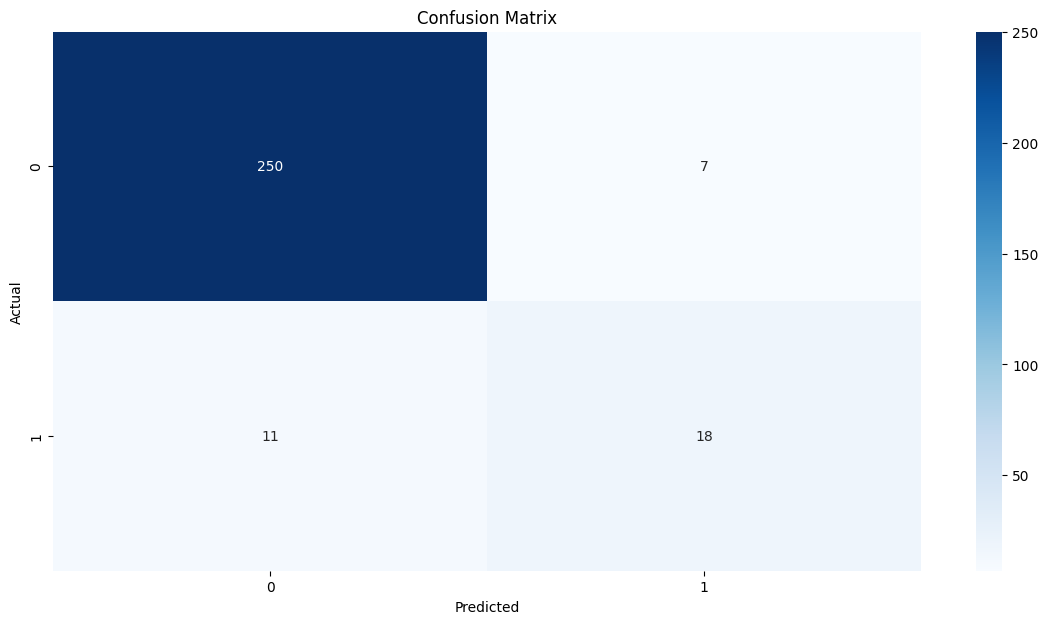

In [20]:
# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(14, 7))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Progundidad del árbol
arbol=DecisionTreeClassifier(max_depth=3)

In [22]:
# Datos de entrenamiento
arbol.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(max_depth=3)

In [23]:
# Prediición mediante score() para los datos de prueba
arbol.score(X_test, y_test)

0.9335664335664335

In [24]:
# Prediición mediante score() para los datos de entrenamiento
arbol.score(X_entrenamiento, y_entrenamiento)

0.9370629370629371

In [25]:
# Recuperando Datos para el esquema de árbol en un archivo (arbol1.dot)
export_graphviz(arbol, out_file='arbol1.dot', class_names=target2, 
                feature_names=features, impurity=False, filled=True)

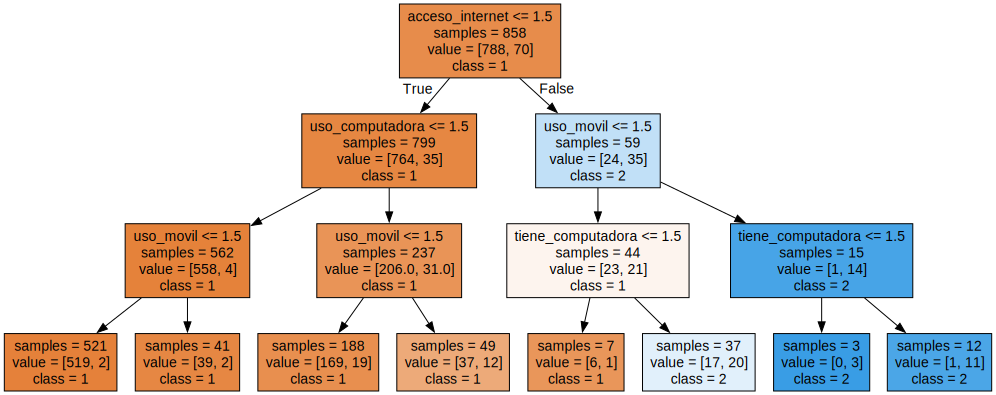

In [26]:
with open('arbol1.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

## Análisis de Clústeres K-Means

In [27]:
# Carga de librerias
from sklearn.cluster import KMeans
from sklearn import metrics

In [28]:
# Separacion de BBDD

# Selección de columnas asignadas a datos
bbdd_colsdatos = ['tiene_computadora', 'acceso_internet', 'uso_computadora', 'uso_movil']
df_datos = df_hogares_personas[bbdd_colsdatos]

# Selección de columnas asignadas a etiquetas
bbdd_colsetiquetas = ['uso_internet']
df_etiquetas = df_hogares_personas[bbdd_colsetiquetas]

# Conversion de dataframe a numpy array
df_datos = np.array(df_datos)
df_etiquetas = np.array(df_etiquetas)


In [29]:
df_datos

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       ...,
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int64)

In [30]:
df_etiquetas

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [40]:
#df_etiquetas = df_etiquetas.ravel()

# Convierte a una dimensión usando reshape()
df_etiquetas = df_etiquetas.reshape(-1)

In [41]:
# Se asigna la cantidad de clusteres y el numero de iteraciones
k_means = KMeans(n_init='auto', n_clusters=2, max_iter=100)

k_means.fit(df_datos)
#predicciones del grupo al que cree que pertenece
predicciones=k_means.predict(df_datos)
print(predicciones)

#podemos comparar los resultados predichos con las etiquetas que ya teniamos
#para ver cuán bien aprendio.
score=metrics.adjusted_rand_score(df_etiquetas, predicciones)

#El resultado es un 73% lo cual no es muy bueno
print(score)

[0 0 0 ... 0 0 0]
0.4655070677361582


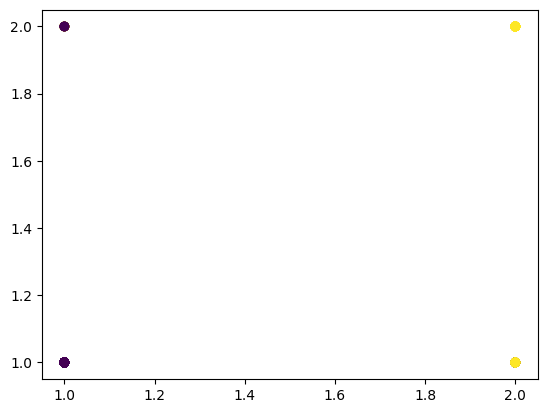

In [37]:
plt.scatter(df_datos[:, 0], df_datos[:, 1], c=predicciones)
plt.show()

In [39]:
df_datos

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       ...,
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int64)